<a href="https://colab.research.google.com/github/FM-Man/Power-Consumpsion-Prediction-With-Weather-Data/blob/main/Linear_Regression_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Trying The Effect Of Normalization On Tthe Cooficients
----------------------
###For Barishal 2019 informations weather

##Correlation Matrix before normalization

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from datetime import datetime as date

<ipython-input-3-eaa8a07b34e1>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


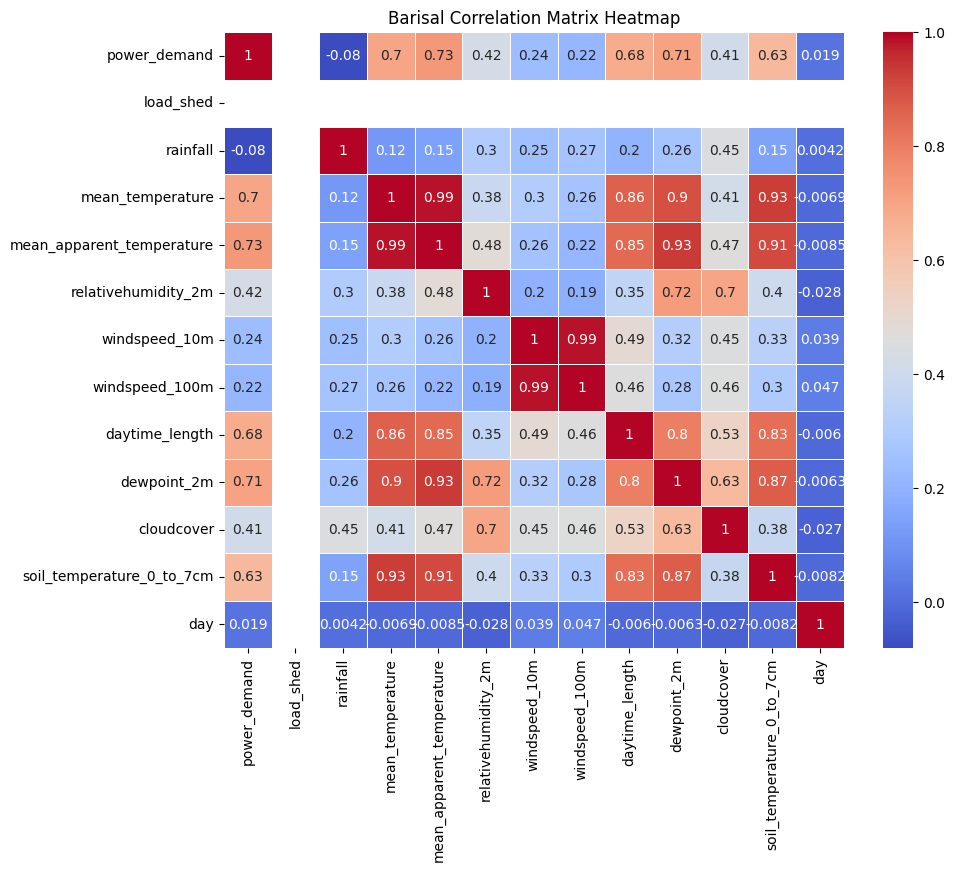

In [3]:
# Load your CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/dataset/barishal2019additionalcolumn.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/barishal2019withday.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Barisal Correlation Matrix Heatmap')
plt.show()

###Min-Max Scaling

In [4]:
def normalize(column):
  minimum = min(column)
  maximum = max(column)
  new_col = []
  for data in column:
    new_col.append( (data-minimum)/(maximum-minimum) )
  return new_col

In [ ]:
print(df['mean_apparent_temperature'])

0      18.9
1      19.1
2      18.3
3      16.9
4      17.5
       ... 
355    18.3
356    16.7
357    17.8
358    18.9
359    19.7
Name: mean_apparent_temperature, Length: 360, dtype: float64


In [ ]:
print( normalize(df['mean_apparent_temperature']))

[0.10045662100456616, 0.1095890410958905, 0.07305936073059366, 0.009132420091324167, 0.03652968036529683, 0.0684931506849315, 0.09589041095890416, 0.08219178082191783, 0.08675799086758, 0.10502283105022833, 0.027397260273972664, 0.041095890410959, 0.10045662100456616, 0.10045662100456616, 0.10502283105022833, 0.041095890410959, 0.09589041095890416, 0.1141552511415525, 0.1141552511415525, 0.10045662100456616, 0.136986301369863, 0.17351598173515984, 0.2511415525114155, 0.25570776255707767, 0.2922374429223745, 0.2968036529680365, 0.2511415525114155, 0.17351598173515984, 0.013698630136986332, 0.07762557077625566, 0.1552511415525115, 0.182648401826484, 0.19634703196347034, 0.1552511415525115, 0.1141552511415525, 0.1552511415525115, 0.2648401826484018, 0.315068493150685, 0.315068493150685, 0.19634703196347034, 0.10045662100456616, 0.1552511415525115, 0.2465753424657535, 0.2922374429223745, 0.3333333333333333, 0.26027397260273966, 0.2465753424657535, 0.32876712328767116, 0.36986301369863017, 

###Normalizing the Dataset

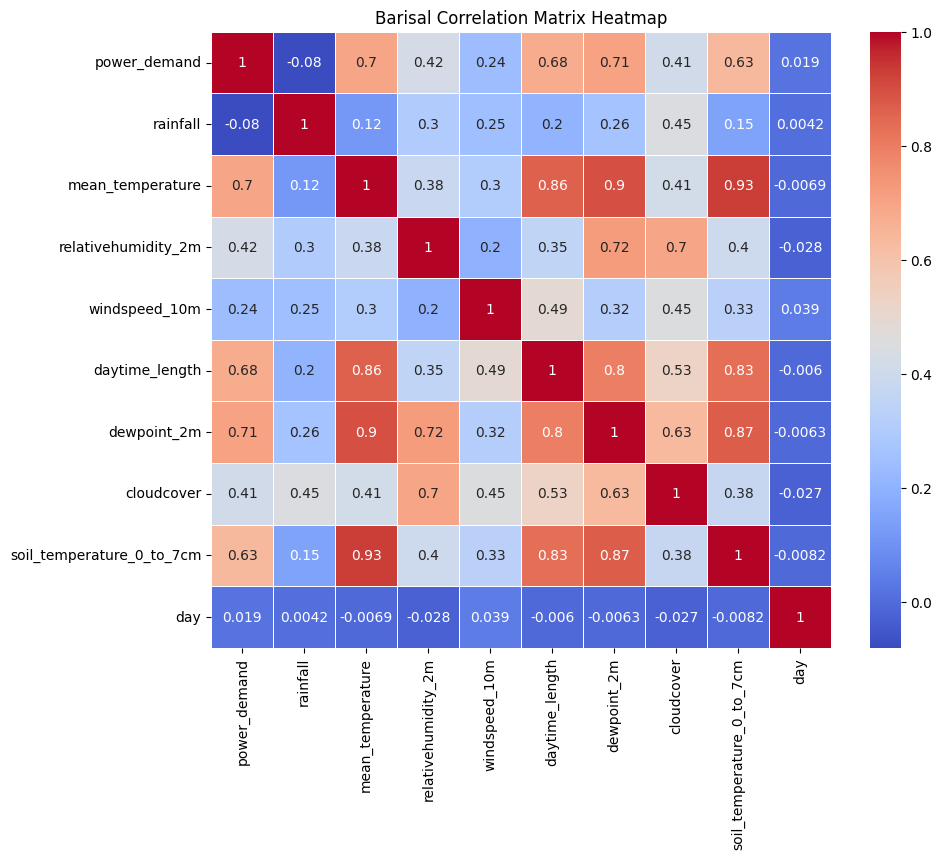

In [5]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Barisal Correlation Matrix Heatmap')
plt.show()

###Observations
* Normalization doesn't change correlation

#OLS Regression
###Independent Variable:
* rainfall
* mean_temperature
* relativehumidity_2m
* windspeed_10m
* daytime_length
* dewpoint_2m
* cloudcover
* soil_temperature_0_to_7cm
* day (weekend/weekdays)

In [6]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'relativehumidity_2m','windspeed_10m', 'daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     63.67
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.43e-68
Time:                        13:39:15   Log-Likelihood:                -1821.1
No. Observations:                 360   AIC:                             3662.
Df Residuals:                     350   BIC:                             3701.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###Observations
* The Constant coeeficient is more realistic now
* but most of the other coeeficients are still not interpretable

## New Regression
* mean_temperature
* windspeed_10m
* relativehumidity_2m
* daytime_length
* dewpoint_2m
* cloudcover
* soil_temperature_0_to_7cm


---


removed day and rainfall due to there being no correlation

In [7]:
X = normalized_df[['mean_temperature','windspeed_10m', 'relativehumidity_2m', 'daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     61.87
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.40e-57
Time:                        13:39:20   Log-Likelihood:                -1851.2
No. Observations:                 360   AIC:                             3718.
Df Residuals:                     352   BIC:                             3750.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###Observations
* The coeeficients are realistic now except for soil temperature
* R squared drops significantly
* p value for relative humidity is very bad

##New Regression
* Removed relative humidity

In [8]:
X = normalized_df[['mean_temperature','daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     86.76
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.38e-59
Time:                        13:39:25   Log-Likelihood:                -1851.7
No. Observations:                 360   AIC:                             3715.
Df Residuals:                     354   BIC:                             3739.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###Observations
* all the p values are really good but soil temperature coeeficient is till unintuitive

##New Regression
* Removed soil temperature

In [9]:
X = normalized_df[['mean_temperature','daytime_length','dewpoint_2m','cloudcover']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           5.33e-58
Time:                        13:39:29   Log-Likelihood:                -1857.3
No. Observations:                 360   AIC:                             3725.
Df Residuals:                     355   BIC:                             3744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              111.3006     15.229  

###Observation
* R square doesn't drop significantly
* the p values of mean temperature and  cloud cover jumps up extremely bad

## New Regression
* Dropped cloud cover

In [10]:
X = normalized_df[['mean_temperature','daytime_length','dewpoint_2m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           5.80e-59
Time:                        13:39:32   Log-Likelihood:                -1857.6
No. Observations:                 360   AIC:                             3723.
Df Residuals:                     356   BIC:                             3739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              117.3425     13.265  

###Observations:
* R square doesn't change at all
* The coeeficients are better
* p value of mean temperature is still more than being acceptable

##New Regression
* Drop Mean Temperature

In [11]:
X = normalized_df[['daytime_length','dewpoint_2m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.07e-59
Time:                        13:39:35   Log-Likelihood:                -1858.7
No. Observations:                 360   AIC:                             3723.
Df Residuals:                     357   BIC:                             3735.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.1826     12.619      8.

###Observation
* P values are perfect
* R squared values doesn't change either

## New regression
* swap daytime length for mean temperature

In [12]:
X = normalized_df[['mean_temperature','dewpoint_2m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.44e-57
Time:                        13:39:44   Log-Likelihood:                -1863.7
No. Observations:                 360   AIC:                             3733.
Df Residuals:                     357   BIC:                             3745.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.4801     12.852  

###Observation
* p values are good
* R squared value drops a little

##NEW Regression
* Added rainfall
---
##Best for Barishal
---

In [13]:
X = normalized_df[['daytime_length','dewpoint_2m','rainfall']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           6.62e-72
Time:                        13:39:50   Log-Likelihood:                -1827.4
No. Observations:                 360   AIC:                             3663.
Df Residuals:                     356   BIC:                             3678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             98.1913     11.691      8.

###Observation
* R squared value jumps up
* p value is extremely satisfactory

In [14]:
X = normalized_df[['daytime_length','dewpoint_2m','rainfall','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.26e-71
Time:                        13:39:54   Log-Likelihood:                -1827.1
No. Observations:                 360   AIC:                             3664.
Df Residuals:                     355   BIC:                             3684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             95.6452     12.155      7.

### Observation
* Adding day doesn't help and its effect is insignificant

---
#***Regression for DHAKA***
---


In [17]:
file_path = "/content/drive/MyDrive/dataset/dhaka2019additionalcolumn.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/dhaka2019withday.csv', index=False)

##Dhaka Normalization and Correlation Matrix

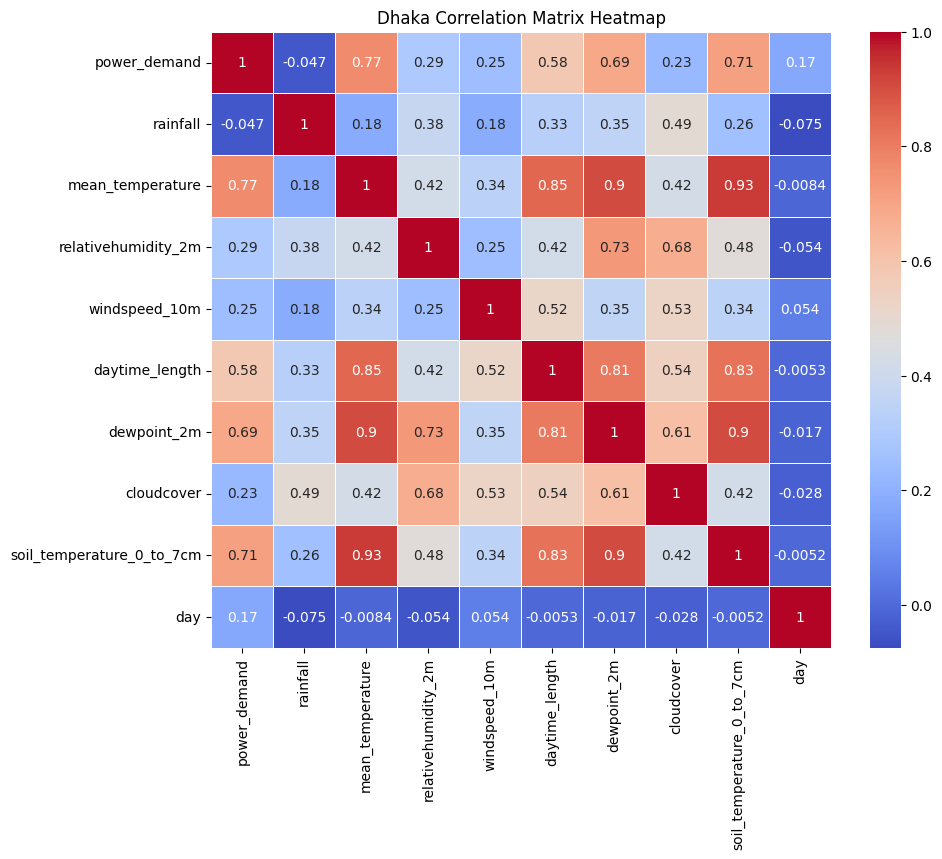

In [18]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Dhaka Correlation Matrix Heatmap')
plt.show()

###Observations
* effect of humidity, cloud cover, daytime length is less in dhaka
* effect of soil temperature and day is more in dhaka

---
#Regression for Dhaka
---
Starting with all the variables

In [19]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'relativehumidity_2m','windspeed_10m', 'daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     80.50
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           9.13e-80
Time:                        13:40:24   Log-Likelihood:                -2624.0
No. Observations:                 360   AIC:                             5268.
Df Residuals:                     350   BIC:                             5307.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###Observations
*

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'relativehumidity_2m','windspeed_10m', 'daytime_length','dewpoint_2m','cloudcover','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     90.73
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.05e-80
Time:                        10:22:27   Log-Likelihood:                -2624.2
No. Observations:                 360   AIC:                             5266.
Df Residuals:                     351   BIC:                             5301.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2217.7249    

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'relativehumidity_2m','windspeed_10m', 'daytime_length','dewpoint_2m','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.95e-81
Time:                        10:23:30   Log-Likelihood:                -2625.3
No. Observations:                 360   AIC:                             5267.
Df Residuals:                     352   BIC:                             5298.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2376.9027    

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'relativehumidity_2m', 'daytime_length','dewpoint_2m','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           6.52e-82
Time:                        10:24:23   Log-Likelihood:                -2626.2
No. Observations:                 360   AIC:                             5266.
Df Residuals:                     353   BIC:                             5294.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2404.0556    

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'daytime_length','dewpoint_2m','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.71e-81
Time:                        10:25:43   Log-Likelihood:                -2630.6
No. Observations:                 360   AIC:                             5273.
Df Residuals:                     354   BIC:                             5297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1924.6592    117.645  

---
##BEST OUTCOME FOR DHAKA
---

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'dewpoint_2m','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.63e-81
Time:                        10:26:44   Log-Likelihood:                -2634.0
No. Observations:                 360   AIC:                             5278.
Df Residuals:                     355   BIC:                             5297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1986.5965    116.156  

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall', 'daytime_length','dewpoint_2m','day']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.14e-69
Time:                        10:27:58   Log-Likelihood:                -2660.2
No. Observations:                 360   AIC:                             5330.
Df Residuals:                     355   BIC:                             5350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1527.4675    115.489     13.

---
###***KHULNA***
---

In [ ]:
file_path = "/content/drive/MyDrive/dataset/khulna-2018-01-01-2018-12-31.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/Khulna2018AdditionalColumnwithday.csv', index=False)

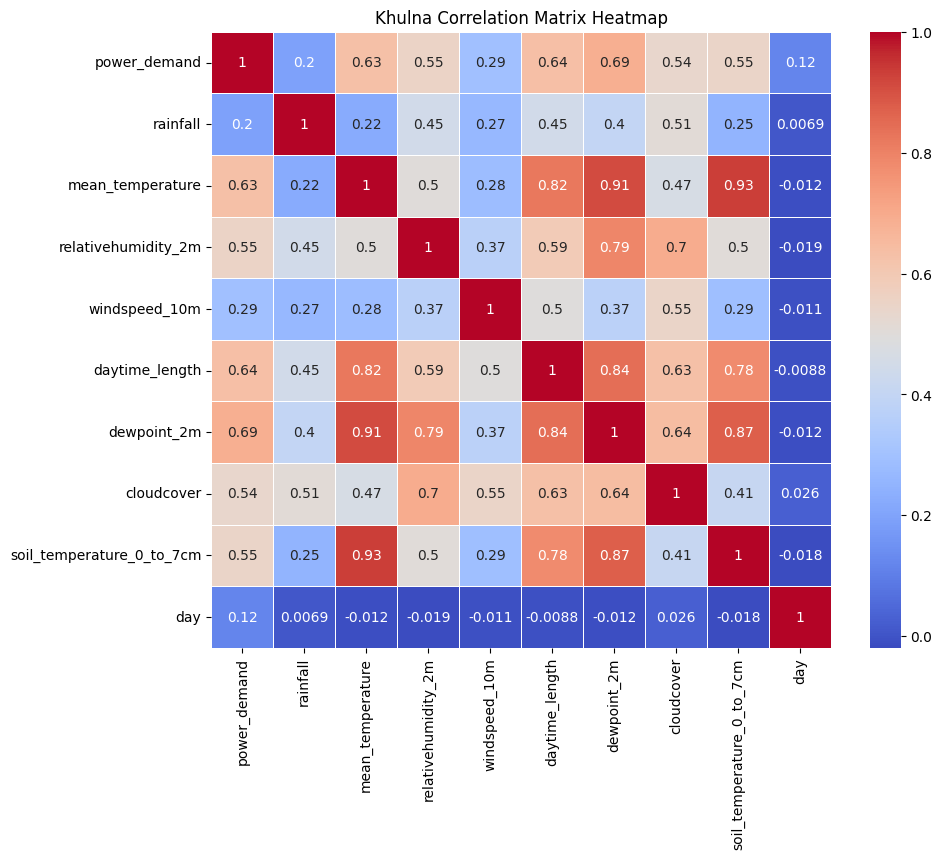

In [ ]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Khulna Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['mean_temperature', 'dewpoint_2m', 'rainfall', 'day', 'cloudcover', 'windspeed_10m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     64.16
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.29e-53
Time:                        13:14:33   Log-Likelihood:                -2230.5
No. Observations:                 360   AIC:                             4475.
Df Residuals:                     353   BIC:                             4502.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              629.8110     38.600  

---
###***RANGPUR***
---

In [ ]:
file_path = "/content/drive/MyDrive/dataset/rangpur-2018-01-01-2018-12-31.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/Rangpur2018AdditionalColumnwithday.csv', index=False)

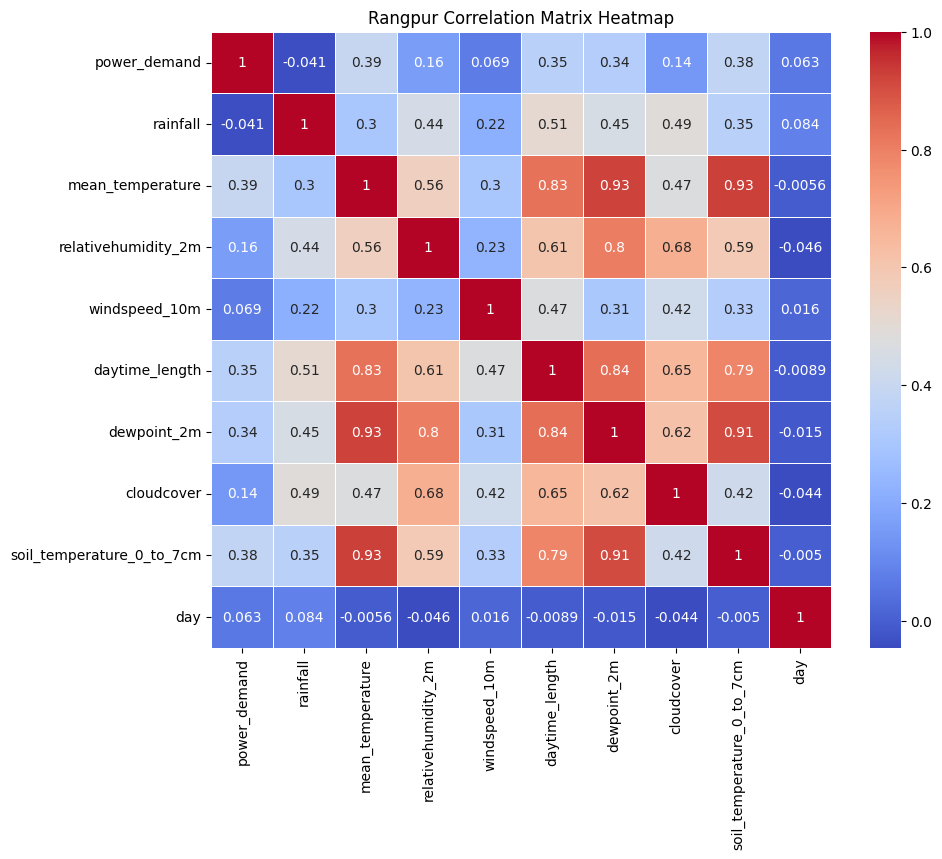

In [ ]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Rangpur Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'cloudcover', 'windspeed_10m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     20.08
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           6.36e-15
Time:                        12:58:58   Log-Likelihood:                -1920.8
No. Observations:                 360   AIC:                             3852.
Df Residuals:                     355   BIC:                             3871.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              490.0178     10.314  

---
###***RAJSHAHI***
---

In [ ]:
file_path = "/content/drive/MyDrive/dataset/rajshahi-2018-01-01-2018-12-31.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/Rajshahi2018AdditionalColumnwithday.csv', index=False)

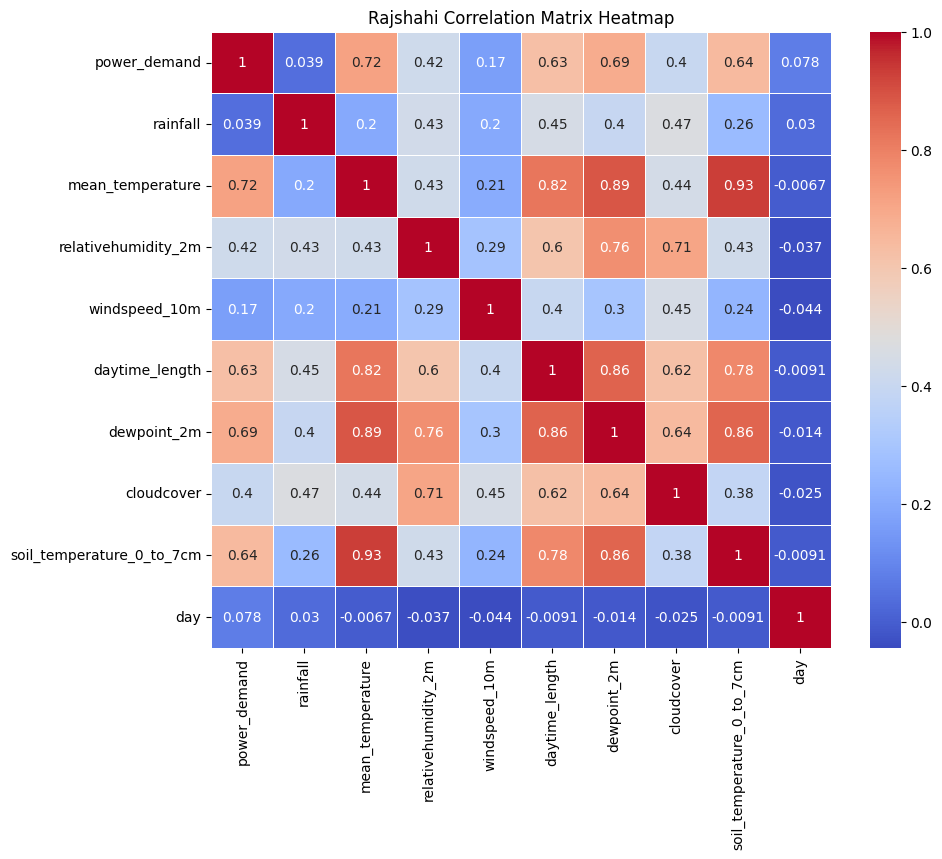

In [ ]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Rajshahi Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['mean_temperature',  'dewpoint_2m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.30e-58
Time:                        13:02:18   Log-Likelihood:                -2103.1
No. Observations:                 360   AIC:                             4212.
Df Residuals:                     357   BIC:                             4224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              672.2729     16.493  

---
###***SYLHET***
---

In [ ]:
file_path = "/content/drive/MyDrive/dataset/sylhet-2018-01-01-2018-12-31.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/Sylhet2018AdditionalColumnwithday.csv', index=False)

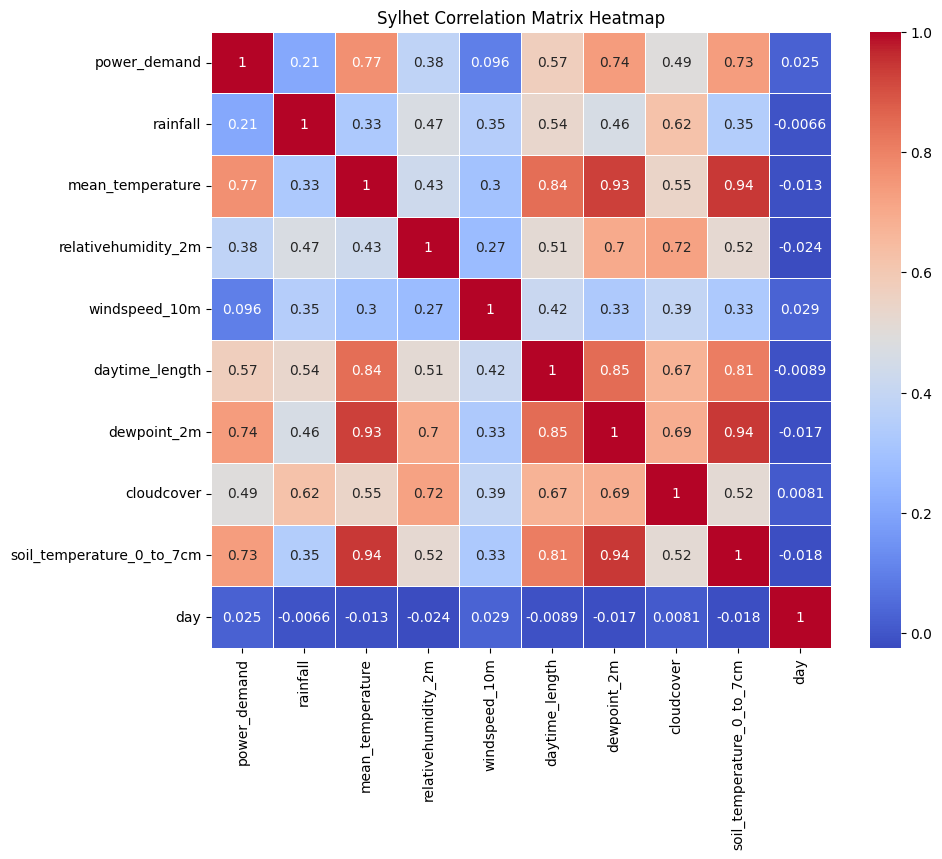

In [ ]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sylhet Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['rainfall','mean_temperature', 'cloudcover', 'windspeed_10m']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     152.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           9.63e-76
Time:                        12:53:08   Log-Likelihood:                -1852.0
No. Observations:                 360   AIC:                             3714.
Df Residuals:                     355   BIC:                             3733.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              264.5426      9.290  

---
###***CHITTAGONG***
---

In [ ]:
file_path = "/content/drive/MyDrive/dataset/chittagong-2022-01-01-2022-12-31.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/Chittagong2022AdditionalColumnwithday.csv', index=False)

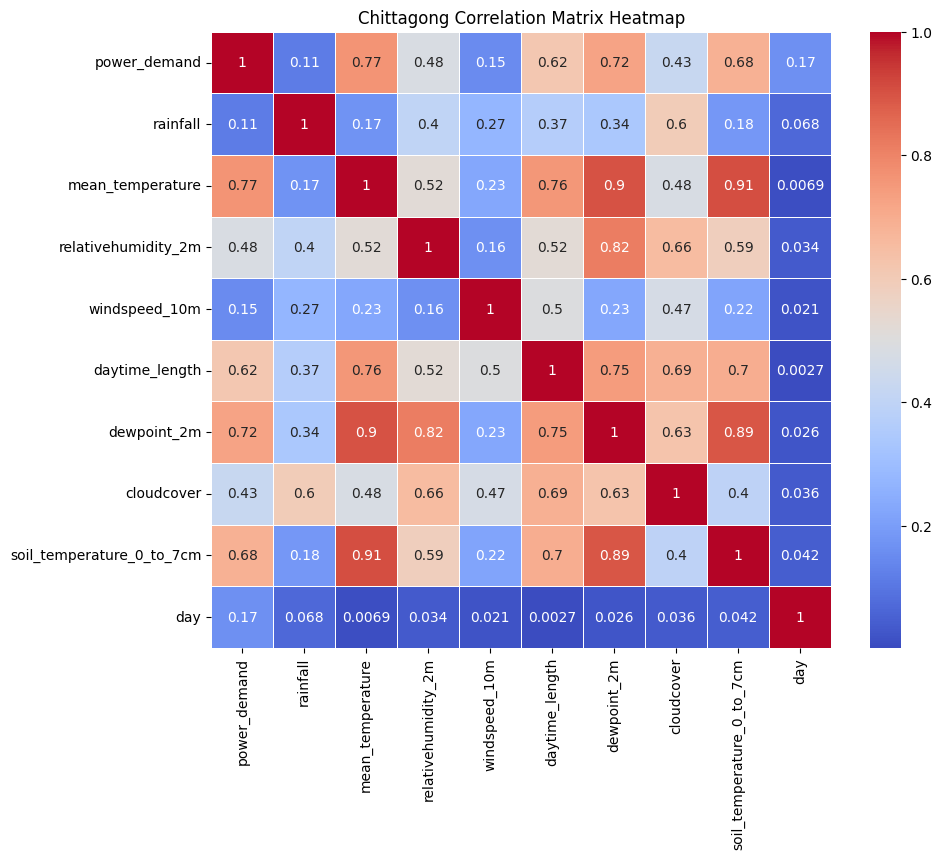

In [ ]:
normalized={}
normalized['power_demand']=df['power_demand']
normalized['rainfall']=normalize(df['rainfall'])
normalized['mean_temperature']=normalize(df['mean_temperature'])
normalized['relativehumidity_2m']=normalize(df['relativehumidity_2m'])
normalized['windspeed_10m']=normalize(df['windspeed_10m'])
normalized['daytime_length']=normalize(df['daytime_length'])
normalized['dewpoint_2m']=normalize(df['dewpoint_2m'])
normalized['cloudcover']=normalize(df['cloudcover'])
normalized['soil_temperature_0_to_7cm']=normalize(df['soil_temperature_0_to_7cm'])
normalized['day'] = normalize(df['day'])
#,,,,
normalized_df = pd.DataFrame(normalized)
correlation_matrix = normalized_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Chittagong Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = normalized_df[['mean_temperature', 'dewpoint_2m', 'rainfall', 'day', 'cloudcover']]
Y = normalized_df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     118.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.37e-73
Time:                        13:11:48   Log-Likelihood:                -2137.1
No. Observations:                 359   AIC:                             4286.
Df Residuals:                     353   BIC:                             4309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              795.0669     36.715  